In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import json

In [19]:
#sub_dir = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-02-26/'
#sub_dir = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/ORBITAL_12-layer_k7/'
#sub_dir = '/volatile/jl277509/Runs/02_STS_babies/Output/FIP/'
#sub_dir = '/volatile/jl277509/Runs/02_STS_babies/Output/ElasticDeform'
#sub_dir = '/neurospin/dico/jlaval/Output/5_models_FIP_right_3_layer_proj'
#sub_dir = '/neurospin/dico/jlaval/Output/ABLATION_FIP/'
sub_dir = '/neurospin/dico/jlaval/Output/option1/SOr_left_UKB40/'
#sub_dir = '/neurospin/dico/jlaval/Output/option1/FIP_right_UKB40/'
sub_dir = '/neurospin/dico/jlaval/Output/option1/SC-sylv_left_UKB40/'

In [20]:
#models = ['17-16-30_112', '18-37-28_0', '18-37-28_1', '18-37-28_2', '18-37-28_3', '18-37-28_4']
#models = ['14-35-49_163', '21-38-51_0', '21-38-51_1', '21-38-51_2', '21-38-51_3']
#models = ['11-45-15_0', '11-45-15_1', '11-45-15_2', '11-45-15_3', '11-45-15_4']
#models = ['19-57-02_0', '19-57-02_1', '19-57-02_2']
#models = ['12-12-35_0']
#models = ['14-17-27_0', '14-17-27_1', '14-17-27_2', '14-17-27_3']
#models = ['16-44-39_0', '16-44-39_1', '16-44-39_2', '16-44-39_3']
#models = ['17-19-54_0', '17-19-54_1', '17-19-54_2', '17-19-54_3']
#models = ['random_all_keep_bottom_5', 'random_all_keep_bottom_6', 'random_all_keep_bottom_7', 'random_all_keep_bottom_8', 'random_all_keep_bottom_9', 'random_all_keep_bottom_10']
#models = ['14-17-27_0', '14-17-27_1', '14-17-27_2', '14-17-27_3']
#models = [f'1-5mm_L4_{k}' for k in range(5)]
#models = [f'16-36-43_{k}' for k in range(3)]
#models = [f'14-06-51_{k}' for k in range(3)]
#models = [f'15-58-57_{k}' for k in range(3)]
#models = [f'16-54-10_{k}' for k in range(4)] + [f'20-17-23_{k}' for k in range(2)]
#models = [f'SimCLR_L{k}' for k in [10, 30, 50, 100, 256, 512]]
#models = [f'BT_bs{i}_L{j}' for i in [16, 32, 64] for j in [128, 256, 512]]
#models = ['2mm_old_L256', '2mm_old_L512', '2mm_L256']
models = os.listdir(sub_dir)
models = [elem for elem in models if 'config' not in elem and 'multirun' not in elem]
#models = [elem for elem in models if 'dim' in elem]
models.sort()
#models = [elem for elem in models if 'lambda1e-3' in elem]
#models = [elem for elem in models if '12-layer' in elem]
#models = ['BT_L128', 'BT_autocorrel']
#models = [f'12-layer-ConvNet__30epochs_lr1e-4_{k}' for k in range(5)] + [f'12-layer-ConvNet__30epochs_lr4e-5_{k}' for k in range(5)]
#epochs = [k for k in range(0, 60, 10)]
epochs = [30]
#models = ['random_all_keep_bottom_5']
#epochs = [k for k in range(0, 250)]

In [21]:
models

['1_cutin_no-keep-bottom12-13-51_181',
 '1_cutin_no-keep-bottom12-30-51_32',
 '1_cutin_no-keep-bottom12-30-52_100',
 '1_cutin_no-keep-bottom12-30-53_216',
 '1_cutin_no-keep-bottom12-30-55_252',
 '3_cutin_cutout_keep-bottom07-39-10_144',
 '3_cutin_cutout_keep-bottom07-39-10_153',
 '3_cutin_cutout_keep-bottom07-39-10_192',
 '3_cutin_cutout_keep-bottom07-39-10_49',
 '3_cutin_cutout_keep-bottom07-39-10_60',
 '4_cutin_cutout_trimdepth_no-keep-bottom15-11-23_227',
 '4_cutin_cutout_trimdepth_no-keep-bottom15-54-08_17',
 '4_cutin_cutout_trimdepth_no-keep-bottom15-55-53_1',
 '4_cutin_cutout_trimdepth_no-keep-bottom16-00-11_63',
 '4_cutin_cutout_trimdepth_no-keep-bottom16-01-54_237',
 '5_cutin_cutout_trimdepth_keep-bottom17-37-44_1',
 '5_cutin_cutout_trimdepth_keep-bottom17-37-45_213',
 '5_cutin_cutout_trimdepth_keep-bottom17-41-23_65',
 '5_cutin_cutout_trimdepth_keep-bottom17-59-47_86',
 '5_cutin_cutout_trimdepth_keep-bottom18-50-02_214',
 '6_all_augmentations_no-keep-bottom22-34-08_103',
 '6_a

In [27]:
# here group the AUCs by root name and plot for last epoch
#sub_dir = '/neurospin/dico/jlaval/Output/ABLATION_FIP/'
#sub_dir = '/neurospin/dico/jlaval/Output/ABLATION_orbital/'
#sub_dir = '/neurospin/dico/jlaval/Output/FIP_right_regular_augm'
#auc_file = 'FIP_right_custom_embeddings/Right_FIP/test_values.json'
#auc_file = 'troiani_custom_embeddings/Left_OFC/test_values.json'
#auc_file = '42433_ukb_ORBITAL_left_random_embeddings/Age/full_values.json'
#metric = 'test_auc'
auc_file = 'hcp_isomap_random_embeddings/Isomap_central_left_dim5/full_values.json'
metric = 'full_r2'
#metric = 'full_mae'

#models = os.listdir(sub_dir)
#models = [elem for elem in models if 'config' not in elem and 'multirun' not in elem]


#root_names = ['no_cutin', 'no_cutout', 'no_trimdepth', 'no_trimextremities', 'all_augms', 'no_translation']
#root_names = ['trimdepth', 'trimextremities', 'cutin']
root_names = ['1_cutin_no-keep-bottom', '2_cutin_cutout_no-keep-bottom', '3_cutin_cutout_keep-bottom', '4_cutin_cutout_trimdepth_no-keep-bottom', '5_cutin_cutout_trimdepth_keep-bottom', '6_all_augmentations_no-keep-bottom']
for name in root_names:
    #l_models = [elem for elem in models if elem.startswith(name)]
    l_models = [elem for elem in models if name in elem]
    l_perfs = []
    for model in l_models:
        with open(os.path.join(sub_dir, model, auc_file), 'r') as f:
            perf = json.load(f)
            if isinstance(perf[metric], float):
                value = perf[metric]
            else:
                value = perf[metric][0]
            print(model, value)
            l_perfs.append(value)
    print(np.mean(l_perfs), np.std(l_perfs))
    print('')

1_cutin_no-keep-bottom12-13-51_181 0.221044242024529
1_cutin_no-keep-bottom12-30-51_32 0.19358660374308445
1_cutin_no-keep-bottom12-30-52_100 0.24031607995311888
1_cutin_no-keep-bottom12-30-53_216 0.2463524668222743
1_cutin_no-keep-bottom12-30-55_252 0.23232384041224563
0.22672464659105046 0.018610353242993996

nan nan

3_cutin_cutout_keep-bottom07-39-10_144 0.4413793720428758
3_cutin_cutout_keep-bottom07-39-10_153 0.46300581465469304
3_cutin_cutout_keep-bottom07-39-10_192 0.460121248342801
3_cutin_cutout_keep-bottom07-39-10_49 0.46482653895108916
3_cutin_cutout_keep-bottom07-39-10_60 0.4620199229015619
0.4582705793786042 0.008581357663711778

4_cutin_cutout_trimdepth_no-keep-bottom15-11-23_227 0.32885527199559905
4_cutin_cutout_trimdepth_no-keep-bottom15-54-08_17 0.34527262233768097
4_cutin_cutout_trimdepth_no-keep-bottom15-55-53_1 0.3660715675621645
4_cutin_cutout_trimdepth_no-keep-bottom16-00-11_63 0.2920268512093095
4_cutin_cutout_trimdepth_no-keep-bottom16-01-54_237 0.386186553202

# ABLATION

In [12]:
# instead of printing, add in table
from pathlib import Path
import pandas as pd

sub_dirs = {'SOr': ['/neurospin/dico/jlaval/Output/option1/SOr_left_UKB40/', ['troiani_embeddings/Left_OFC/full_values.json'], 'full_weighted_auc'],
            'FIP': ['/neurospin/dico/jlaval/Output/option1/FIP_right_UKB40/', ['FIP_right_embeddings/Right_FIP/full_values.json'], 'full_auc'],
            'SC-sylv': ['/neurospin/dico/jlaval/Output/option1/SC-sylv_left_UKB40/', [f'hcp_isomap_embeddings/Isomap_central_left_dim{k}/full_values.json' for k in range(1,7)], 'full_r2']}

sub_dirs = {'SOr': ['/neurospin/dico/jlaval/Output/3_combinations_ablation/SOr_left', ['troiani_embeddings/Left_OFC/full_values.json'], 'full_weighted_auc'],
            'FIP': ['/neurospin/dico/jlaval/Output/3_combinations_ablation/FIP_right', ['FIP_right_embeddings/Right_FIP/full_values.json'], 'full_auc'],
            'SC-sylv': ['/neurospin/dico/jlaval/Output/3_combinations_ablation/SC-sylv_left', [f'hcp_isomap_embeddings/Isomap_central_left_dim{k}/full_values.json' for k in range(1,7)], 'full_r2']}


#sub_dir = '/neurospin/dico/jlaval/Output/option1/SOr_left_UKB40/'
#sub_dir = '/neurospin/dico/jlaval/Output/option1/FIP_right_UKB40/'
#sub_dir = '/neurospin/dico/jlaval/Output/option1/SC-sylv_left_UKB40/'
#auc_file = 'hcp_isomap_random_embeddings/Isomap_central_left_dim5/full_values.json'
#metric = 'full_r2'
#root_names = ['1_cutin_no-keep-bottom', '2_cutin_cutout_no-keep-bottom', '3_cutin_cutout_keep-bottom', '4_cutin_cutout_trimdepth_no-keep-bottom', '5_cutin_cutout_trimdepth_keep-bottom', '6_all_augmentations_no-keep-bottom', '7_all_augmentations_keep-bottom']
root_names=['1_all_augmentations_keep_bottom']

# store everything globally
l_model_glob = []
l_perf_glob = []
l_region_glob = []
l_task_glob = []


for region, (sub_dir, auc_files, metric) in sub_dirs.items(): 
    for auc_file in auc_files:
        models = os.listdir(sub_dir)
        models = [elem for elem in models if 'config' not in elem and 'multirun' not in elem]
        models.sort()
        task = Path(auc_file).parts[-2]
        for name in root_names:
            #l_models = [elem for elem in models if elem.startswith(name)]
            l_models = [elem for elem in models if name in elem]
            l_perfs = []
            for model in l_models:
                with open(os.path.join(sub_dir, model, auc_file), 'r') as f:
                    perf = json.load(f)
                    if isinstance(perf[metric], float):
                        value = perf[metric]
                    else:
                        value = perf[metric][0]
                    l_perfs.append(value)
            l_model_glob.append(l_models)
            l_perf_glob.append(l_perfs)
            l_region_glob.append([region for _ in range(len(l_perfs))])
            l_task_glob.append([task for _ in range(len(l_perfs))])

FileNotFoundError: [Errno 2] No such file or directory: '/neurospin/dico/jlaval/Output/3_combinations_ablation/2025-02-14/SOr_left/1_all_augmentations_keep_bottom/troiani_embeddings/Left_OFC/full_values.json'

In [9]:
# reformat lists and put inside DataFrame
def flatten_sum(matrix):
    return sum(matrix, [])
cols = ['model', 'region', 'task', 'score']
values = np.array([flatten_sum(l_model_glob), flatten_sum(l_region_glob), flatten_sum(l_task_glob), flatten_sum(l_perf_glob)]).T
df = pd.DataFrame(data=values, columns=cols)


## SAVE RAW RESULTS
#df.to_csv('/home/jl277509/Documents/option1_aucs_no_cross_val.csv', index=False)


In [10]:
# fsimplify model names and aggregate
# TODO : more flexible code !!
lmodels = df['model'].tolist()
#lmodels = [model.split('bottom')[0]+'bottom' for model in lmodels] ## won't generalise ...
lmodels = [model.split('name')[0] for model in lmodels]
df1 = df.copy()
df1['model']=lmodels

In [11]:
df1

,model,region,task,score


In [18]:
df1['group'] = df.index // 5  # Creates group numbers (0,0,0,0,0, 1,1,1,1,1)
df1['score'] = pd.to_numeric(df1['score'], errors='coerce')
averaged_df1 = df1.groupby('group').agg({'model': 'first', 'region': 'first', 'task': 'first', 'score': ['mean', 'std']}).reset_index() ## ADD STD here
averaged_df1.columns = ['group', 'model', 'region', 'task', 'score_mean', 'score_std']
averaged_df1['score_mean']*=100
averaged_df1['score_std']*=100
averaged_df1 = averaged_df1.round(decimals=1)

In [19]:
averaged_df1

,group,model,region,task,score_mean,score_std
0,0,1_cutin_no-keep-bottom,SOr,Left_OFC,83.3,0.5
1,1,2_cutin_cutout_no-keep-bottom,SOr,Left_OFC,83.5,0.3
2,2,3_cutin_cutout_keep-bottom,SOr,Left_OFC,82.5,0.8
3,3,4_cutin_cutout_trimdepth_no-keep-bottom,SOr,Left_OFC,82.0,1.5
4,4,5_cutin_cutout_trimdepth_keep-bottom,SOr,Left_OFC,84.2,1.0
5,5,6_all_augmentations_no-keep-bottom,SOr,Left_OFC,81.0,1.6
6,6,7_all_augmentations_keep-bottom,SOr,Left_OFC,84.8,0.5
7,7,1_cutin_no-keep-bottom,FIP,Right_FIP,87.5,0.5
8,8,2_cutin_cutout_no-keep-bottom,FIP,Right_FIP,87.6,1.5
9,9,3_cutin_cutout_keep-bottom,FIP,Right_FIP,84.5,2.2


In [20]:
averaged_df1.to_csv('/home/jl277509/Documents/option1_aucs_summary_no_cross_val.csv', index=False)

In [83]:
df_merged = pd.merge(averaged_df1, df1)

In [84]:
df_merged

,group,score,model,region,task


In [ ]:
# simplify df by aggregating same configs


In [34]:
## read csv
import pandas as pd
res = pd.read_csv('/home/jl277509/Documents/option1_aucs.csv', sep=' ')

In [42]:
res['model']

0                   1_cutin_no-keep-bottom12-30-17_86
1                  1_cutin_no-keep-bottom13-14-38_115
2                   1_cutin_no-keep-bottom13-16-14_60
3                  1_cutin_no-keep-bottom13-24-52_250
4                  1_cutin_no-keep-bottom13-32-44_118
                            ...                      
97     6_all_augmentations_no-keep-bottom22-34-08_113
98      6_all_augmentations_no-keep-bottom22-37-54_28
99     6_all_augmentations_no-keep-bottom22-38-36_234
100    6_all_augmentations_no-keep-bottom22-41-47_200
101                                0.3659592207113417
Name: model, Length: 102, dtype: object

In [45]:
model = '3_cutin_cutout_keep-bottom'
res[res['model'].str.contains(model)]['auc'].mean()

np.float64(0.6748867088475342)

In [40]:
# Preterms
#embeddings = ['dHCP', 'dHCP', 'dHCP', 'dHCP', 'dHCP', 'dHCP', 'dHCP','UKB_5percent', 'UKB_5percent']
#labels = ['Preterm_28', 'Preterm_32', 'Preterm_37', 'Preterm_23-28_vs_fullterm', 'Preterm_23-32_vs_fullterm',
#          'Preterm_28-32_vs_fullterm', 'Preterm_32-37_vs_fullterm','Age', 'Sex']
#sets = ['full', 'full', 'full', 'train_val', 'train_val', 'train_val', 'train_val', 'train_val', 'train_val']
#sets = ['full', 'full', 'full', 'full', 'full', 'full', 'full', 'train_val', 'train_val']
#sets = ['full' for k in range(9)]
#colors = ['darkred', 'orangered', 'royalblue', 'deepskyblue', 'darkgreen', 'gold', 'yellowgreen', 'black', 'gray']

# PCS
#embeddings=['ACC_custom']
#labels=['Right_PCS']
#sets = ['test']
#colors = ['royalblue']

# OFC (troiani)
#embeddings=['troiani_custom']
#labels=['Left_OFC']
#sets=['test']
#colors=['royalblue']
#weighted='_weighted'

# FIP
embeddings=['FIP_right_custom']
labels=['Right_FIP']
sets=['test']
colors=['royalblue']
weighted=''


"""
# site effect
embeddings=['Site_UKB_hcp']
labels=['Site']
sets=['test']
colors=['royalblue']
weighted=''

# Isomap
embeddings=['troiani' for k in range(1,7)]
labels=[f'Isomap_central_left_dim{k}' for k in range(1,7)]
sets=['test' for k in range(1,7)]
colors=['b','r', 'k', 'c', 'g', 'y']
weighted=''
"""

"\n# site effect\nembeddings=['Site_UKB_hcp']\nlabels=['Site']\nsets=['test']\ncolors=['royalblue']\nweighted=''\n\n# Isomap\nembeddings=['troiani' for k in range(1,7)]\nlabels=[f'Isomap_central_left_dim{k}' for k in range(1,7)]\nsets=['test' for k in range(1,7)]\ncolors=['b','r', 'k', 'c', 'g', 'y']\nweighted=''\n"

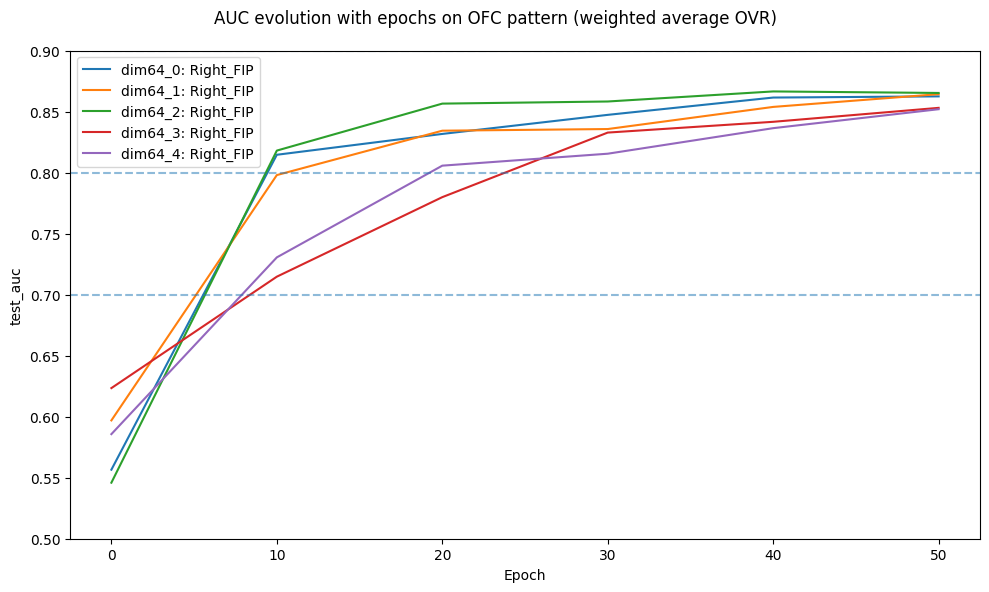

In [41]:
## MODELS ON SAME PLOT

fig, ax = plt.subplots(figsize=(10,6))

for embedding, label, s in zip(embeddings, labels, sets):
    metric, target = f'{s}{weighted}_auc', f'{s}_values.json'
    selected_models_dirs = [root for root, dirs, files in os.walk(sub_dir, followlinks=True)
                                    if (target in files) & (root.endswith(label)) & (embedding in root) & ('best_model' not in root)]
    dict_perf = {model : [] for model in models}
    dict_perf['epoch'] = []
    for model in models:
        for epoch in epochs:
            for directory in selected_models_dirs:
                if ('epoch'+str(epoch)+'_' in directory) and (model+'/' in directory):
                    with open(os.path.join(directory,target), 'r') as f:
                        perf = json.load(f)
                    if isinstance(perf[metric], float):
                        value = perf[metric]
                    else:
                        value = perf[metric][0]
                    dict_perf['epoch'].append(epoch)
                    dict_perf[model].append(value)
    for i, model in enumerate(models):
        if model in dict_perf.keys():
            x, y = epochs, dict_perf[model]
            if i==0:
                ax.plot(x[:len(y)], y, label=model+': '+label)
            else:
                ax.plot(x[:len(y)], y, label=model+': '+label)

ax.axline((0, 0.90), (1, 0.90), linestyle='--', alpha=0.5)
ax.axline((0, 0.80), (1, 0.80), linestyle='--', alpha=0.5)
ax.axline((0, 0.70), (1, 0.70), linestyle='--', alpha=0.5)
ax.set_xlabel('Epoch')
ax.set_ylabel(metric)
ax.legend()
ax.set_ylim([0.5, 0.9])
plt.suptitle(f'AUC evolution with epochs on OFC pattern (weighted average OVR)')
plt.tight_layout()
plt.show()

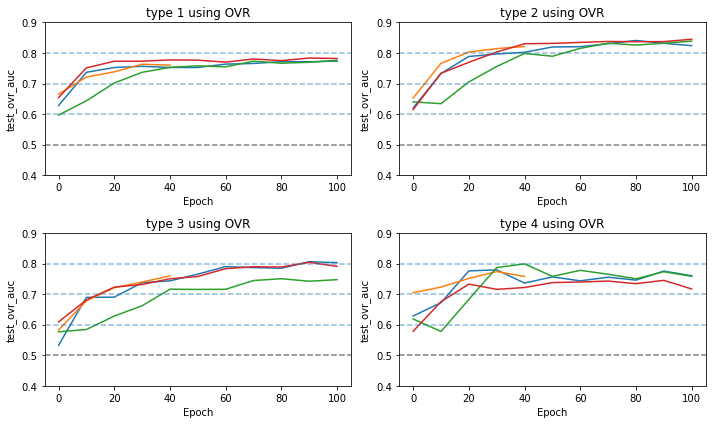

In [7]:
# MULTICLASS, INDIVIDUAL AUC PLOT
classes = ['1','2','3','4']
fig, axs = plt.subplots(figsize=(10,6), ncols=2, nrows=int(len(classes)/2) + bool(len(classes)%2))

for i, cl in enumerate(classes):
    ax = axs[int(i/2), i%2]
    for embedding, label, s in zip(embeddings, labels, sets):
        metric, target = f'{s}_ovr_auc', f'{s}_values.json'
        selected_models_dirs = [root for root, dirs, files in os.walk(sub_dir, followlinks=True)
                                        if (target in files) & (root.endswith(label)) & (embedding in root) & ('best_model' not in root)]
        dict_perf = {model : [] for model in models}
        dict_perf['epoch'] = []
        for model in models:
            for epoch in epochs:
                for directory in selected_models_dirs:
                    if ('epoch'+str(epoch)+'_' in directory) and (model+'/' in directory):
                        with open(os.path.join(directory,target), 'r') as f:
                            perf = json.load(f)
                        if isinstance(perf[metric], float):
                            value = perf[metric]
                        else:
                            value = perf[metric][0][i]
                        dict_perf['epoch'].append(epoch)
                        dict_perf[model].append(value)
        for i, model in enumerate(models):
            if model in dict_perf.keys():
                x, y = epochs, dict_perf[model]
                if i==0:
                    ax.plot(x[:len(y)], y, label=model)
                else:
                    ax.plot(x[:len(y)], y, label=model)

    #ax.axline((0, 0.90), (1, 0.90), linestyle='--', alpha=0.5)
    ax.axline((0, 0.80), (1, 0.80), linestyle='--', alpha=0.5)
    ax.axline((0, 0.70), (1, 0.70), linestyle='--', alpha=0.5)
    ax.axline((0, 0.60), (1, 0.60), linestyle='--', alpha=0.5)
    ax.axline((0, 0.50), (1, 0.50), linestyle='--', alpha=0.5, c='black')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric)
    ax.set_ylim([0.4, 0.9])
    ax.set_title(f'type {cl} using OVR')
    if i==0:
        ax.legend()
plt.tight_layout()
plt.show()

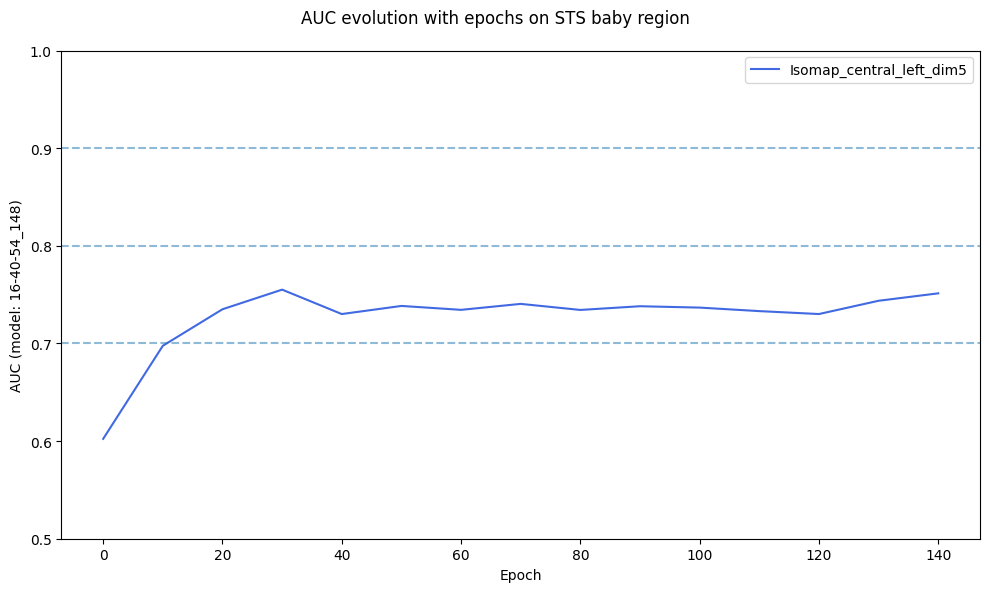

In [14]:
### MODELS ON INDIVIDUAL PLOTS

fig, axs = plt.subplots(figsize=(10,6*len(models)), nrows=len(models))

for embedding, label, s, c in zip(embeddings, labels, sets, colors):
    metric, target = f'{s}_auc', f'{s}_values.json'
    selected_models_dirs = [root for root, dirs, files in os.walk(sub_dir, followlinks=True)
                                    if (target in files) & (root.endswith(label)) & (embedding in root) & ('best_model' not in root)]
    dict_perf = {model : [] for model in models}
    dict_perf['epoch'] = []
    for model in models:
        for epoch in epochs:
            for directory in selected_models_dirs:
                if ('epoch'+str(epoch)+'_' in directory) and (model+'/' in directory):
                    with open(os.path.join(directory,target), 'r') as f:
                        perf = json.load(f)
                    if isinstance(perf[metric], float):
                        value = perf[metric]
                    else:
                        value = perf[metric][0]
                    dict_perf['epoch'].append(epoch)
                    dict_perf[model].append(value)
        for i, model in enumerate(models):
            if model in dict_perf.keys():
                if len(models)==1:
                    ax=axs
                else:
                    ax=axs[i]
                x, y = epochs, dict_perf[model]
                if i==0:
                    ax.plot(x[:len(y)], y, label=label, c=c)
                else:
                    ax.plot(x[:len(y)], y, c=c)

for i, model in enumerate(models):
    if len(models)==1:
        ax=axs
    else:
        ax=axs[i]
    ax.axline((0, 0.90), (1, 0.90), linestyle='--', alpha=0.5)
    ax.axline((0, 0.80), (1, 0.80), linestyle='--', alpha=0.5)
    ax.axline((0, 0.70), (1, 0.70), linestyle='--', alpha=0.5)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(f'AUC (model: {model})')
    ax.legend()
    ax.set_ylim([0.5, 1])
plt.suptitle(f'AUC evolution with epochs on STS baby region')
plt.tight_layout()
plt.show()